# 이미지 프로세싱 기초
### 1. 관심 영역

In [16]:
# 이미지 불러오기
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./picture/bird.jpg')

# 관심 영역의 좌표 지정
x = 1000; y = 200; w = 550; h = 550

# cv2는 세로, 가로 순서로 길이를 지정한다.. → 행, 렬 순으로 슬라이싱하기 때문에
roi = img[y:y+h, x:x+w]

print(roi.shape)

# 지정한 관심 영역에 사각형 그리기
cv2.rectangle(roi, (0, 0), (h-1, w-1), (0, 0, 0), 5) # roi 이미지에서 roi의 시작점 ~ h, w 만큼(끝점-1) 사각형 그리기
cv2.imshow('Img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(550, 550, 3)


In [27]:
### 관심영역 복제 및 새 창 띄우기
import cv2
import numpy as np

img = cv2.imread('./picture/bird.jpg')

# 원본 이미지에서 관심 영역을 지정하기
x = 1000; y = 200; w = 550; h = 550
roi = img[y:y+h, x:x+w]

# 관심 영역만 copy하기
img2 = roi.copy()
# 원본 이미지의 왼쪽에 roi를 넣기
img[y:y+h, x-w:x] = roi
# roi가 들어가 있는 원본 이미지에 사각형 그리기.
cv2.rectangle(img, (x-w, y), (x+w, y+h), (0,0,0))

# 원본이미지 + roi이미지
cv2.imshow('img', img)
# roi 이미지 부분만
cv2.imshow('roi', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
### 마우스로 관심 영역 지정하기
import numpy as np
import cv2

isDragging = False
x0, y0, w, h = -1, -1, -1, -1 #시작점 = 무효값
blue = (255, 0, 0)
red = (0, 0, 255)

def onMouse(event, x, y, flags, param):
    global isDragging, x0, y0, img

    # 만약 마우스 우클릭 상태이면 → 드래그 상태 True, 시작 좌표를 각각 x0, y0에 저장
    if event == cv2.EVENT_LBUTTONDOWN:
        isDragging = True
        x0 = x
        y0 = y

    # 만약 마우스 이동상태 + isDragging True 상태이면
    elif event == cv2.EVENT_MOUSEMOVE:
        if isDragging:
            # 원본 이미지 copy
            img_draw = img.copy()
            # 원본 이미지에 클릭 시작점 ~ 이동하는 x,y 만큼의 사각형 그리기
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2)
            # 사각형이 그려진 img 보여주기
            cv2.imshow('img', img_draw)

    # 마우스 우클릭 해제 상태이면
    elif event == cv2.EVENT_LBUTTONUP:
        # isDragging을 False로 바꿔준다 → 마우스 이동을 더이상 읽을 필요 없게!
        if isDragging:
            isDragging = False
            # 시작점 x0, y0을 마지막 이동 위치인 x, y에서 빼서 총 움직인 거리 h, w를 구한다.
            w = x - x0
            h = y - y0
            print(x0, y0, w, h)
            
            # 두 이동거리가 양수인 경우 = 좌상단에서 우하향으로 이동한 경우
            if w > 0 and h > 0:
                # 원본 이미지 copy
                img_draw = img.copy()
                # 원본 이미지에 최종 영역으로 만들어진 빨간 사각형 그리기
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2)
                # 사각형 좌표만큼으로 관심 영역으로 지정
                roi = img[y0:y0+h, x0:x0+w]
                # 잘려나온 이미지 roi 보여주기
                cv2.imshow('cropped', roi)
                # 이때  보여줄 창을 왼쪽 상단에 고정
                cv2.moveWindow('cropped', 0, 0)
                # 그리고 그 이미지를 저장하기
                cv2.imwrite('./picture/cropped.jpg', roi)
                print('Cropped.')
            
            # 만약 이동거리가 음수이면 안내 문구 출력
            else:
                cv2.imshow('img', img)
                print('좌측 상단에서 우측 하단으로 드래그하세요')


img = cv2.imread('./picture/love1.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey()
cv2.destroyAllWindows()

626 321 342 246
Cropped.


In [36]:
### selectROI → 관심 영역 지정을 위한 cv2의 함수
import cv2
import numpy as np

img = cv2.imread('./picture/letters.jpg')

x, y, w, h = cv2.selectROI('img', img, False)

if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)
    cv2.moveWindow('cropped', 0, 0)
    cv2.imwrite('./picture/cropped.jpg', roi)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


### 2. 컬러 스페이스

In [42]:
### BGR, BGRA, Alpha
import numpy as np
import cv2

img = cv2.imread('./picture/opencv_logo.png')
bgr = cv2.imread('./picture/opencv_logo.png', cv2.IMREAD_COLOR)
bgra = cv2.imread('./picture/opencv_logo.png', cv2.IMREAD_UNCHANGED) # 4차원 체널을 살려서 불러오기

res1 = cv2.resize(img, dsize=(750, 500), interpolation=cv2.INTER_CUBIC)
res2 = cv2.resize(bgr, dsize=(750, 500), interpolation=cv2.INTER_CUBIC)
res3 = cv2.resize(bgra, dsize=(750, 500), interpolation=cv2.INTER_CUBIC)

print('img shape: ', res1.shape)
print('bgr shape: ', res2.shape)
print('bgra shape: ', res3.shape) #(500, 750, 4)

cv2.imshow('bgr', res1)
cv2.imshow('bgra', res2)
 # 그렇다면 마지막 체널은 뭘까? = 배경은 검정(0), 그림은 흰색(255)를 갖는다.
cv2.imshow('alpha', res3[:, :, 3])

cv2.waitKey(0)
cv2.destroyAllWindows()

img shape:  (500, 750, 3)
bgr shape:  (500, 750, 3)
bgra shape:  (500, 750, 4)


In [46]:
### 컬러 스페이스 → 그레이 스케일
import cv2
import numpy as np

img = cv2.imread('./picture/woman.jpg')
img = cv2.resize(img, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)

img2 = img.astype(np.uint16) # 합치면 255보다 큰 값이 나올 수 있으니까 잠깐 바꿔준다.
b, g, r = cv2.split(img2)
# 권장 : b, g, r = img2[:,:,0], img2[:,:,1], img2[:,:,2] (split은 copy를 사용하기 때문에 자원을 많이 쓴다...)
gray1 = ((b+g+r)/3).astype(np.uint8) # 계산후의 값에 다시 uint8로 변환해준다.
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
### BGR에서 HSV로 변환 (색상만 볼 수 있다)
import cv2
import numpy as np

red_bgr = np.array([[[0, 0, 255]]], dtype=np.uint8)
green_bgr = np.array([[[0, 255, 0]]], dtype=np.uint8)
blue_bgr = np.array([[[255, 0, 0]]], dtype=np.uint8)
yellow_bgr = np.array([[[0, 255, 255]]], dtype=np.uint8)

red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV)

# BGR 기본 색상은 가장 선명하고 밝은색이므로 hsv에서 순도와 밝기 정보는 각각 255, 255로 출력
# hsv의 h는 기본적으로 컬러 정보를 말한다.
print('red : ', red_hsv)
print('green : ', green_hsv)
print('blue : ', blue_hsv)
print('yellow : ', yellow_hsv)

red :  [[[  0 255 255]]]
green :  [[[ 60 255 255]]]
blue :  [[[120 255 255]]]
yellow :  [[[ 30 255 255]]]


In [49]:
### BGR에서 YUV로 변환 (밝기만 볼 수 있다)
import cv2
import numpy as np

dark = np.array([[[0, 0, 0]]], dtype=np.uint8)
middle = np.array([[[127, 127, 127]]], dtype=np.uint8)
bright = np.array([[[255, 255, 255]]], dtype=np.uint8)

dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

# YUV는 밝기와 R, B의 차를 이용한 값으로 표현
# 밝기, 밝기 - R, 밝기 - B 
print('dark : ', dark_yuv)
print('middle : ', middle_yuv)
print('bright : ', bright_yuv)

dark :  [[[  0 128 128]]]
middle :  [[[127 128 128]]]
bright :  [[[255 128 128]]]


### 3. 스레시홀딩

127.0


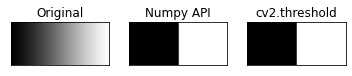

In [51]:
### 전역 스레시홀딩
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./picture/gray_scale.png')

# 원본 이미지와 같은 크기의 0 (검정) 이미지 만들기
thresh_np = np.zeros_like(img)
# 만약 원본의 값이 127을 넘으면 255(흰색)을 검정 이미지에 넣기
thresh_np[img > 127] = 255

# threshold : 이미지에서 threshold를 넘는 값에 특정 값을 넣어 줄  수 있다.
# 경계값과 이미지 반환...
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

imgs = {'Original':img, 'Numpy API':thresh_np, 'cv2.threshold':thresh_cv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

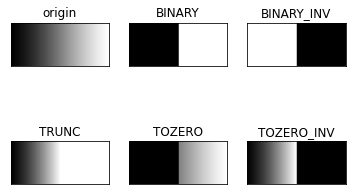

In [54]:
### 다양한 threshold flag
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./picture/gray_scale.png', cv2.IMREAD_GRAYSCALE)

# binary : 특정 임계점을 넘은 값에 지정한 값(255)을 대입, 아닌 값에 0(흑백) 대입
_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# binary_inv : binary의 반대 결과
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
# trunc : threshold를 넘으면 지정값(255)를 아니면 원래의 값을 유지
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
# tozero : 픽셀이 경계값을 넘으면 원래의 값, 아니면 0을 반환
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
# tozero_inv : tozero와 반대, 넘지 못하면 원래의 값, 아니면 0을 반환
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, 'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

otsu threshold: 131.0


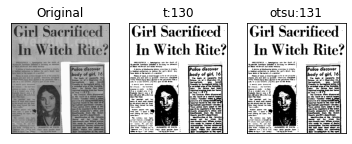

In [55]:
### 오츠의 알고리즘 : 적당한 임계값을 자동으로 계산해준다.
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./picture/scanned_paper.jpg', cv2.IMREAD_GRAYSCALE)

# 경계값을 130으로 지정하여 계산
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
# 오츠의 알고리즘으로 binary 연산에서 img에서 가장 적당한 경계값의 출력 
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold:', t)


imgs = {'Original':img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

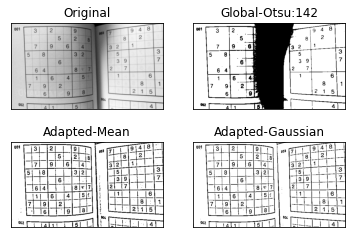

In [59]:
### 적응형 스레시홀드
import numpy as np
import cv2
import matplotlib.pyplot as plt

blk_size = 9
C = 5
img = cv2.imread('./picture/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)

imgs = {'Original':img, 'Global-Otsu:%d'%ret:th1, 'Adapted-Mean':th2, 'Adapted-Gaussian':th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

### 4. 이미지 연산

### 5. 히스토그램